 # Routine to Find Impact Speed of Falling Object
 
 
 This notebook calculates the impact speed of vertically falling object.
 It assumes that the object is falling vertically, and is being dropped from rest.
 
 The equation of motion assumes that the object is subject to a linear drag force

In [1]:
import numpy as np
from scipy import optimize

# to plot our result
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

mpl.rcParams['figure.figsize'] = (16,10)
mpl.rcParams['font.size'] = 18
mpl.rcParams['legend.fontsize'] = 14

# Exercise:

Evaluate the impact speed a polypropylene ball hitting the floor if dropped from rest at a height of 10m.
The diameter of ball is d=0.001m


### Equation of motion



Assuming up direction is defined as positive, the equation of motion is


$$m \frac{d v_y}{dt}  =  - m g - b v_y $$

We can solve this equation analytically, with the initial condition that the projectile is launched from rest at a height, $h$ at time $t=0$

$$v_y(t) = v_{ter} \left( 1 - e^{-\frac{t}{\tau}} \right) $$ 

$$y(t) = h+ v_{ter}  \tau \left( 1 - e^{-\frac{t}{\tau}} \right) - v_{ter} t$$

where the terminal speed, $ v_{ter}= \frac{mg}{b}$ and the characteristic time, $\tau= \frac{m}{b}$


In [2]:
# input parameters 
ballDiameter =0.001 # in meter 
g= 9.8 # in m/s^2
beta= 1.6*10**(-4) # in N*s/m^2 
b= beta* ballDiameter; # drag coefficient
density= 946 # in kg/m^3
ballMass = density*np.pi*(ballDiameter**3)/6
terminalSpeed= ballMass*g/b # in m/s
characteristicTime= terminalSpeed/g; # in seconds
fallHeight = 10; # in meters


In [3]:
# define some functions for the vertical position abd the vertical velocity
def verticalPosition(t, height):
    y= height + terminalSpeed*characteristicTime*(1-np.exp(-t/characteristicTime)) - terminalSpeed*t
    return y

def verticalVelocity(t):
    v= terminalSpeed*(1-np.exp(-t/characteristicTime)) 
    return v

## Solve numerically for fall time


The scipy library has a numerical solver called fsolve.
Given a function $f(x)$ and an initial guess $x_0$ it will attempt to find the root 
$f(x)=0$. It returns the solution in an array

In [4]:
# fsolve solve for the root of a function in our case (verticalPosition(t)=0)
# use 1.4 seconds as an initial guess

fallTime=optimize.fsolve(verticalPosition, 1.4, args=(fallHeight))

print('fallTime in seconds =', fallTime[0])

fallTime in seconds = 1.54742529227


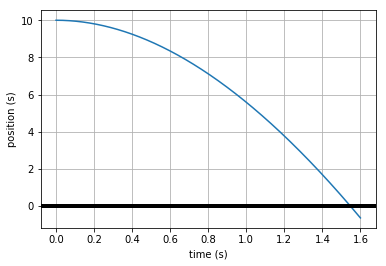

In [5]:
# visual look
t=np.linspace(0, 1.6, 1000);
y=verticalPosition(t,fallHeight)
plt.plot(t,y)


plt.axhline(y=0, linewidth=4, color = 'k') #  ground

plt.xlabel('time (s)')
plt.ylabel('position (s)')
plt.grid()
plt.show()

In [6]:
impactSpeed= np.abs(verticalVelocity(fallTime[0]))

In [7]:
noDragImpactSpeed= np.sqrt(2*g*fallHeight)  # impact speed for object falling with no drag

In [8]:
print('impact Speed with drag=',impactSpeed, 'impact Speed with no drag=', noDragImpactSpeed)

impact Speed with drag= 11.9345618311 impact Speed with no drag= 14.0


In [9]:
print('Terminal Speed=', terminalSpeed, 'Characteristic Time=',characteristicTime)

Terminal Speed= 30.338622055104437 Characteristic Time= 3.095777760724942


## Extra


Let's use the power of the python to solve for the impact speed for a given height and plot the result to compare with the impact speed when no air resistance is present.

In [10]:
# impact speed as a function of height
def impactSpeed(h):
    """
    Returns the impact speed as a function of height
    Assumes the object falls from rest 
    """
    timeGuess=np.sqrt(2*h/g)
    fallTime=optimize.fsolve(verticalPosition, timeGuess, args=h) 
    speed= np.abs(verticalVelocity(fallTime[0]))
    return speed

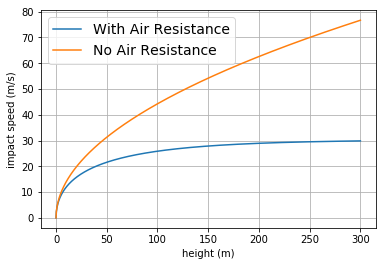

In [11]:
# impact speed for various height 
height=np.linspace(0, 300, 1000);
speed= [impactSpeed(h) for h in height]
noDragSpeed= np.sqrt(2*height*g)

line1, = plt.plot(height,speed, label='With Air Resistance')
line2, = plt.plot(height,noDragSpeed, label='No Air Resistance')
plt.legend(handler_map={line1: HandlerLine2D()})
plt.xlabel('height (m)')
plt.ylabel('impact speed (m/s)')


plt.grid()
plt.show()